In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris.csv


In [4]:
iris=pd.read_csv('iris.csv')

In [5]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris=pd.read_csv('iris.csv',index_col=0)

In [7]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [9]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
#Complete iris datset
label_encoder=preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['Species'])

In [11]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [12]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [13]:
iris['Species'].unique()

array([0, 1, 2])

In [15]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [16]:
#Splitting data into training and testing data
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

Building Decision Tree Classifier (C5.0) using Entropy Criteria

In [17]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

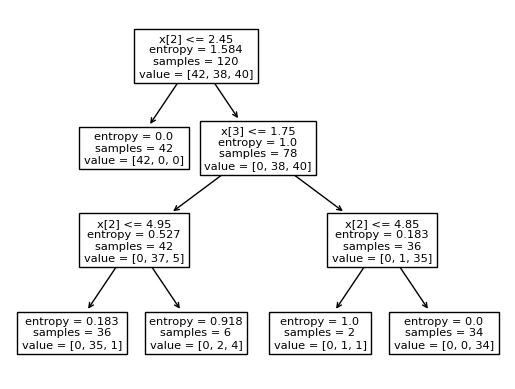

In [19]:
#Plot the decision tree
#Its just to see the tree otherwise its not needed
#from sklearn import tree
tree.plot_tree(model);

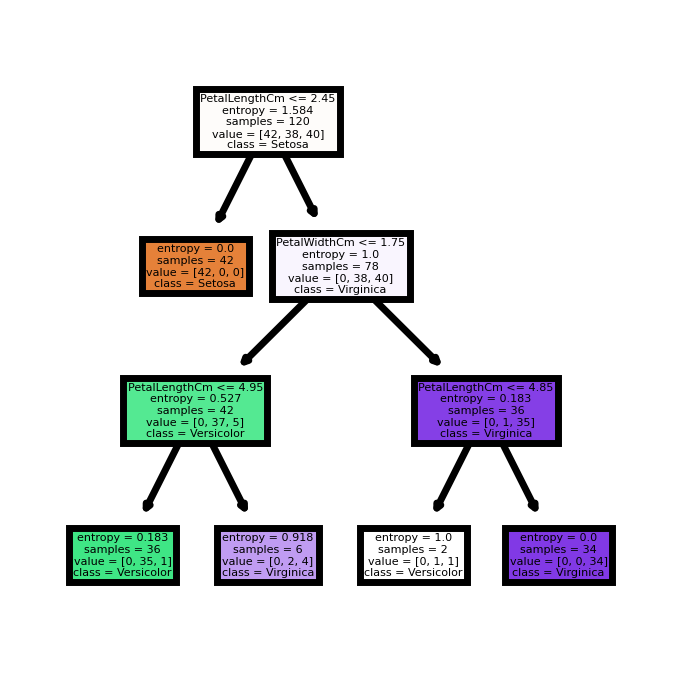

In [23]:
fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']#columns
cn=['Setosa','Versicolor','Virginica']#class
fig,axes=plt.subplots(1,1,figsize=(1.5,1.5),dpi=500)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [24]:
#Predicting on test data
preds=model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    13
2     9
0     8
dtype: int64

In [26]:
y_test.value_counts()

1    12
2    10
0     8
Name: Species, dtype: int64

In [27]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [28]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [30]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.9666666666666667

In [32]:
#mean of values where preds==y_test
np.mean(preds==y_test)

0.9666666666666667

Building Decision Tree Classifier (CART) using Gini Criteria

In [33]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
model_gini

DecisionTreeClassifier(max_depth=3)

In [37]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

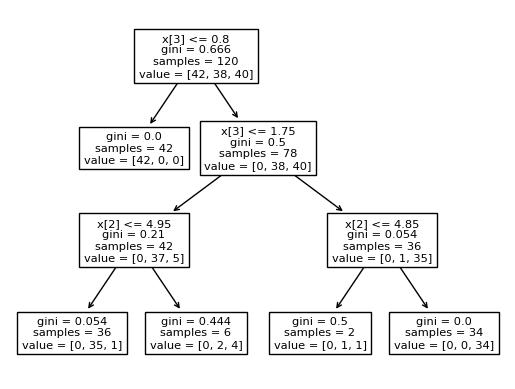

In [38]:
tree.plot_tree(model_gini);

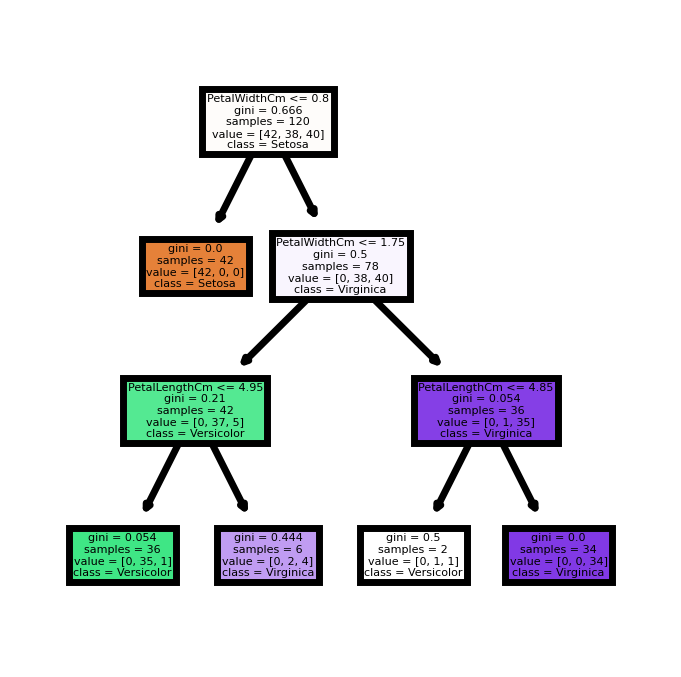

In [39]:
fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']#columns
cn=['Setosa','Versicolor','Virginica']#class
fig,axes=plt.subplots(1,1,figsize=(1.5,1.5),dpi=500)
tree.plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True);